# Desafio Módulo 1 - Bootcamp Alura em Data Science Aplicada

## Objetivo: analisar a relação entre óbitos por causa gerais x óbitos por covid em São Paulo

O objetivo dessa análise, é comparar a relação de óbitos entre causas gerais e óbitos por covid em São Paulo. Para isso vamos baixar os dados disponibilizados no DATASUS (https://datasus.saude.gov.br/) para obtermos os dados por mortes no geral, e os dados no portal Corona Virus Brasil (https://covid.saude.gov.br/) para obtermos os dados por morte devido ao corona vírus. Esses dados sobre a covid foram alimentados pelas Secretarias Estaduais de Saúde, e separados por dia, no período de março de 2020, mês que ocorreu o primeiro óbito por covid, até novembro de 2021 (última atualização). Já os dados de mortes em geral alimentados pelo SUS, são do período de Janeiro de 2008 até Setembro de 2021 (última atualização). Dessa forma, analisaremos os dados no período de Março de 2020 até Setembro de 2021 para realizar nosso trabaho.  
  

### Etapa 1: Carregar os dados do portal DATASUS, analisá-los e filtrar as informações de São Paulo. O arquivo foi baixado no TABNET, filtrando os dados pelas informações dos óbitos por ano/mês de processamento.

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

/home/marco/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Dados do ano e mês de processamento
dados_obitos = pd.read_csv("A170120189_28_143_208.csv", sep=";", encoding="ISO-8859-1", 
                           skiprows = 3, skipfooter = 11 )

# Dados do ano e mês de atendimento
# dados_obitos = pd.read_csv("A180600189_28_143_208.csv", sep=";", encoding="ISO-8859-1", 
#                            skiprows = 3, skipfooter = 11 )




In [3]:
# Tratando a  coluna Região/Unidade da Federação, retirando os pontos e espaços em brancos e 
# convertendo a coluna em índice
dados_obitos['Região/Unidade da Federação'] = [x.replace("..", "").strip() for x in dados_obitos['Região/Unidade da Federação']]
dados_obitos.set_index('Região/Unidade da Federação', inplace=True)
dados_obitos.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Região Norte,1008,1329,1406,1278,1243,1299,1572,1455,1512,1421,...,3666,4318,5413,5196,5131,3910,3446,3083,1575,344104
Rondônia,57,99,45,43,54,47,109,114,105,124,...,446,427,812,736,645,533,392,350,304,40403
Acre,30,94,76,103,94,71,114,116,104,77,...,143,188,205,335,309,121,223,182,-,19785
Amazonas,149,243,312,320,240,270,288,284,254,228,...,1338,1637,1898,1218,897,881,854,684,585,70213
Roraima,23,21,23,38,26,24,38,29,34,62,...,190,322,299,210,168,180,188,190,156,13570


In [44]:
# obtendo os dados a partir de Março de 2020 até Setembro de 2021
colunas = dados_obitos.loc[:,'2020/Jan':'2021/Set'].columns
dados_obitos_novos = dados_obitos[colunas]
dados_obitos_novos.head()

,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Região Norte,2393,2395,2345,2335,3903,5025,3842,3632,2948,2587,...,2700,3666,4318,5413,5196,5131,3910,3446,3083,1575
Rondônia,300,246,257,269,295,358,450,480,414,295,...,366,446,427,812,736,645,533,392,350,304
Acre,157,152,180,138,158,191,192,163,136,173,...,147,143,188,205,335,309,121,223,182,-
Amazonas,520,595,507,629,1484,1465,916,657,673,609,...,607,1338,1637,1898,1218,897,881,854,684,585
Roraima,105,106,107,98,177,328,177,85,107,114,...,127,190,322,299,210,168,180,188,190,156


In [5]:
# Filtrando os dados do Distrito Federal e atribuindo a um novo DataFrame
dados_obito_sp_geral = dados_obitos_novos.loc['São Paulo']
dados_obito_sp_geral = pd.DataFrame(dados_obito_sp_geral)


In [6]:
# Criando um Dicionário de Dados para formatar a os meses com valores numéricos, facilitando a ordenação 
# posteriormente
dic_mes = {"2020/Jan":"2020/01", "2020/Fev":"2020/02", "2020/Mar":"2020/03", "2020/Abr":"2020/04", 
           "2020/Mai":"2020/05","2020/Jun":"2020/06", 
           "2020/Jul":"2020/07", "2020/Ago":"2020/08", "2020/Set":"2020/09", 
           "2020/Out":"2020/10", "2020/Nov":"2020/11", "2020/Dez":"2020/12",
           
           "2021/Jan":"2021/01", "2021/Fev":"2021/02", "2021/Mar":"2021/03", "2021/Abr":"2021/04", 
           "2021/Mai":"2021/05","2021/Jun":"2021/06", 
           "2021/Jul":"2021/07", "2021/Ago":"2021/08", "2021/Set":"2021/09", 
           "2021/Out":"2021/10", "2021/Nov":"2021/11", "2021/Dez":"2021/12"
}

In [7]:
# Alterando os valores do index de acordo com o apresentado no Dicionário de dados
dados_obito_sp_geral.index = dados_obito_sp_geral.index.map(dic_mes)

In [8]:
# renomeando a coluna
dados_obito_sp_geral.rename(columns={"São Paulo":"Obitos Geral"}, inplace=True)

In [9]:
# Verificando os tipos de dados e convertendo os valores para numericos para gerar os gráficos
dados_obito_sp_geral.info()
dados_obito_sp_geral = dados_obito_sp_geral.astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2020/01 to 2021/09
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Obitos Geral  21 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


In [10]:
dados_obito_sp_geral.index

Index(['2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09'],
      dtype='object')

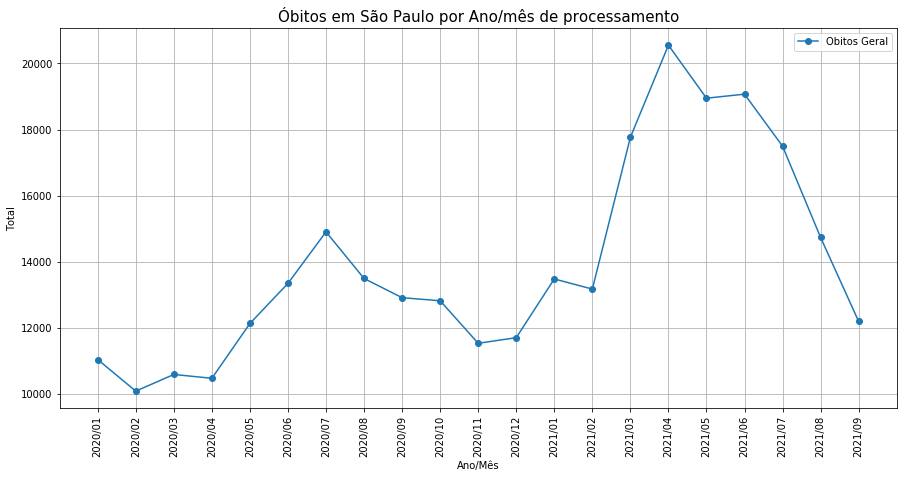

In [46]:
ax = dados_obito_sp_geral.plot(figsize=(15,7), marker="o")
labels = dados_obito_sp_geral.index
total = dados_obito_sp_geral.count()[0]
valores = np.arange(total)
ax.grid()
plt.xlabel("Ano/Mês")
plt.ylabel("Total")
plt.xticks(valores, labels, rotation=90)
plt.title("Óbitos em São Paulo por Ano/mês de processamento", fontdict={"fontsize":15})
plt.show()

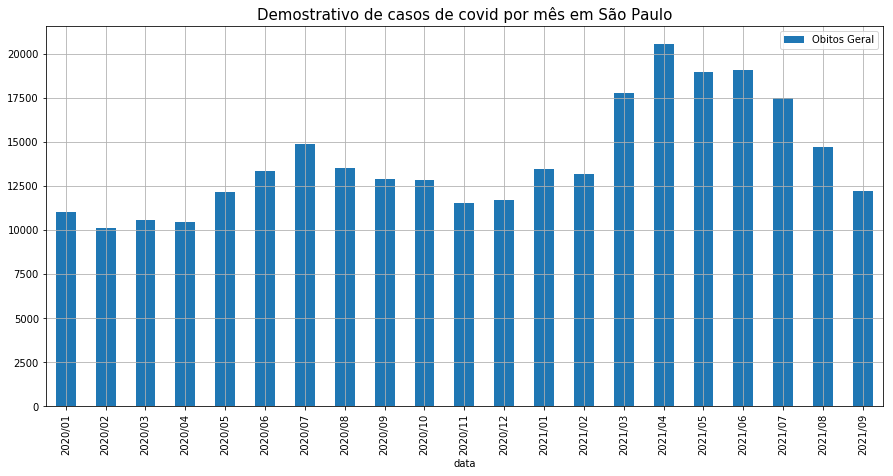

In [47]:
#Outro gráfico importante para análise dos dados, seria um gráfico de barras
ax = dados_obito_sp_geral.plot(kind="bar", figsize=(15,7))
plt.title("Demostrativo de casos de covid por mês em São Paulo", fontdict={"fontsize":15})
plt.grid()
plt.show()

### Etapa 2: Carregar os dados do portal Corona Vírus Brasil, analisá-los e filtrar as informações do Distrito Federal. Os dados baixados tem as informações diárias de mortes por covid por região, e está divido em 4 arquivos.

In [13]:
# carregando os dados
dados_parte1_2020 = pd.read_csv("HIST_PAINEL_COVIDBR_2020_Parte1_13nov2021.csv", sep=";" )
dados_parte2_2020 = pd.read_csv("HIST_PAINEL_COVIDBR_2020_Parte2_13nov2021.csv", sep=";")

dados_parte1_2021 = pd.read_csv("HIST_PAINEL_COVIDBR_2021_Parte1_13nov2021.csv", sep=";")
dados_parte2_2021 = pd.read_csv("HIST_PAINEL_COVIDBR_2021_Parte2_13nov2021.csv", sep=";")

In [14]:
dados_parte2_2021.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-01,26,210147125.0,18622304,65163,520095,2029,16858632.0,1180443.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-02,26,210147125.0,18687469,65165,521952,1857,16931272.0,1170937.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-03,26,210147125.0,18742025,54556,523587,1635,16989351.0,1176166.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-04,27,210147125.0,18769808,27783,524417,830,17033808.0,1184630.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-05,27,210147125.0,18792511,22703,525112,695,17082876.0,1162515.0,NaN


In [15]:
# filtrando os dados de todos os arquivos pelo Distrito Federal
dados_sp_parte1_2020 = dados_parte1_2020.query('nomeRegiaoSaude == "SAO PAULO"')
dados_sp_parte2_2020 = dados_parte2_2020.query('nomeRegiaoSaude == "SAO PAULO"')
dados_sp_parte1_2021 = dados_parte1_2021.query('nomeRegiaoSaude == "SAO PAULO"')
dados_sp_parte2_2021 = dados_parte2_2021.query('nomeRegiaoSaude == "SAO PAULO"')


In [16]:
# Consolidando os dados em um único DataFrame

dados_sp = dados_sp_parte1_2020.append(dados_sp_parte2_2020).append(dados_sp_parte1_2021).append(dados_sp_parte2_2021)

In [17]:
# Visualizando os tipos de dados da colunas do DataFrame
dados_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 492739 to 526863
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regiao                  597 non-null    object 
 1   estado                  597 non-null    object 
 2   municipio               597 non-null    object 
 3   coduf                   597 non-null    int64  
 4   codmun                  597 non-null    float64
 5   codRegiaoSaude          597 non-null    float64
 6   nomeRegiaoSaude         597 non-null    object 
 7   data                    597 non-null    object 
 8   semanaEpi               597 non-null    int64  
 9   populacaoTCU2019        597 non-null    float64
 10  casosAcumulado          597 non-null    float64
 11  casosNovos              597 non-null    int64  
 12  obitosAcumulado         597 non-null    int64  
 13  obitosNovos             597 non-null    int64  
 14  Recuperadosnovos        0 non-null

In [18]:
# Convertendo a coluna data em formato data
dados_sp['data'] = pd.to_datetime(dados_sp['data'])

In [19]:
# Na coluna data, vamos retirar o dia do mês para podermos fazer um agrupamento e soma de todos os óbitos
dados_sp['data'] = dados_sp['data'].dt.strftime("%Y/%m")

In [20]:
dados_sp.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
492739,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020/03,13,12252023.0,0.0,0,0,0,NaN,NaN,1.0
492740,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020/03,13,12252023.0,1149.0,1149,76,76,NaN,NaN,1.0
492741,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020/03,14,12252023.0,1183.0,34,89,13,NaN,NaN,1.0
492742,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020/03,14,12252023.0,1233.0,50,103,14,NaN,NaN,1.0
492743,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020/03,14,12252023.0,1885.0,652,121,18,NaN,NaN,1.0


In [21]:
# Alterando o DataFrame e filtrando somente as colunas de data e casos novos de covid
dados_sp = dados_sp[['data', 'obitosNovos']]

In [22]:
# Agrupando os dados pela data e somando os casos de óbitos e atribuindo a um novo DataFrame
dados_obito_sp_covid = dados_sp.sort_values('data').groupby('data').sum()

In [23]:
# Renomeando a coluna e o índice
dados_obito_sp_covid.rename(columns={"obitosNovos":"Obitos Covid"}, inplace=True)
dados_obito_sp_covid.index.rename("", inplace=True)

In [24]:
# Verificando os tipos de dados do DataFrame
dados_obito_sp_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2020/03 to 2021/11
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Obitos Covid  21 non-null     int64
dtypes: int64(1)
memory usage: 336.0+ bytes


In [25]:
dados_obito_sp_covid.sum()

Obitos Covid    39023
dtype: int64

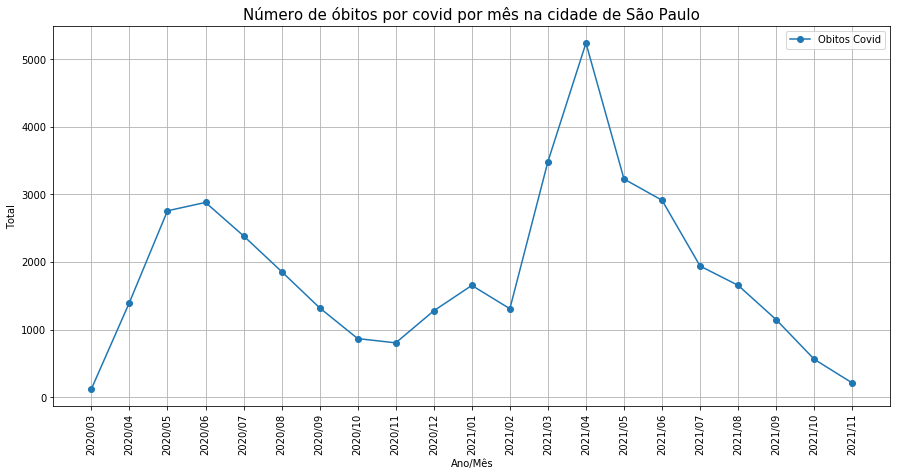

In [48]:
# analisando os dados de morte por covid em um gráfico de linhas
total_registros = dados_obito_sp_covid.count()[0]
ax = dados_obito_sp_covid.plot(figsize=(15,7), marker="o")
quantidade_ticks_x = np.arange(total_registros)
labels = dados_obito_sp_covid.index
plt.xlabel("Ano/Mês")
plt.ylabel("Total")
plt.grid()
plt.xticks(quantidade_ticks_x, labels, rotation=90)
plt.title("Número de óbitos por covid por mês na cidade de São Paulo", fontdict={"fontsize":15})
plt.show()

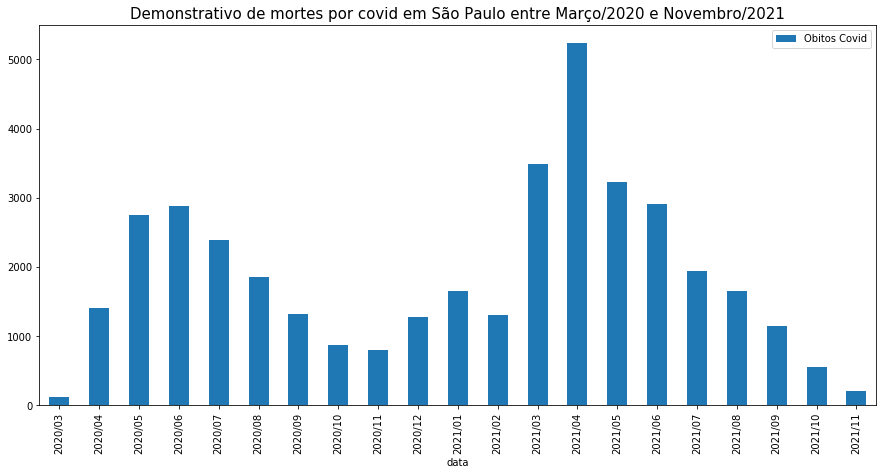

In [38]:
# analisando os dados em um gráfico de barras
ax = dados_obito_sp_covid.plot(kind="bar", figsize=(15,7))
plt.title('Demonstrativo de mortes por covid em São Paulo entre Março/2020 e Novembro/2021', fontdict={"fontsize":15} )
plt.show()

### Etapa 3:  Comparação entre as mortes em geral X mortes por covid em São Paulo

In [28]:
# Renomeando os índices
dados_obito_sp_covid.index.rename("data", inplace=True)
dados_obito_sp_geral.index.rename("data", inplace=True)

In [29]:
# Criando um terceiro DataFrame do resultado do merge entre mortes por covid e mortes em geral

resultado_final = pd.merge(dados_obito_sp_geral, dados_obito_sp_covid,  left_index=True, right_index=True )

In [30]:
resultado_final

,Obitos Geral,Obitos Covid
data,,
2020/03,10595,121
2020/04,10479,1401
2020/05,12136,2758
2020/06,13349,2882
2020/07,14906,2387
2020/08,13496,1859
2020/09,12916,1322
2020/10,12823,867
2020/11,11537,804


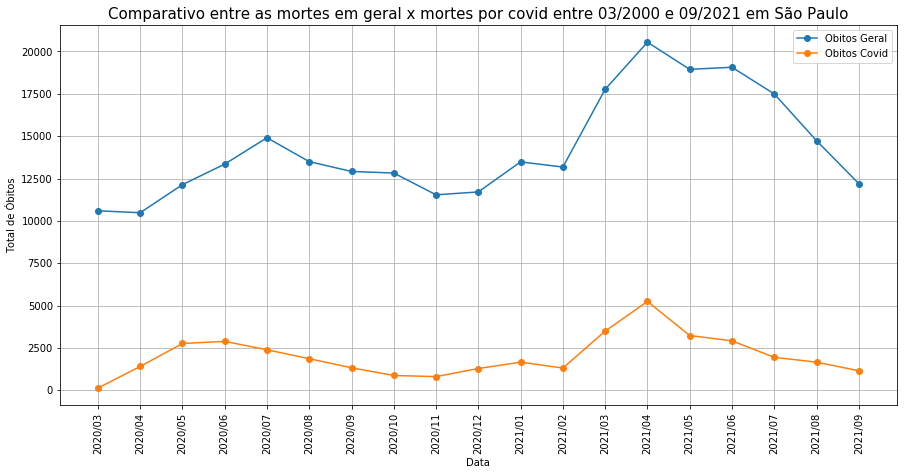

In [37]:
# Analisando em um gráfico de linhas a quantidade de mortes
total_registros = resultado_final.count()[0]
labels = resultado_final.index
quantidade_ticks_x = np.arange(total_registros)
ax = resultado_final.plot( figsize=(15,7), marker="o")
plt.grid()
plt.xlabel("Data")
plt.ylabel("Total de Óbitos")
plt.xticks(quantidade_ticks_x, labels, rotation=90)
plt.title("Comparativo entre as mortes em geral x mortes por covid entre 03/2000 e 09/2021 em São Paulo",
         fontdict={"fontsize":15})
plt.show()

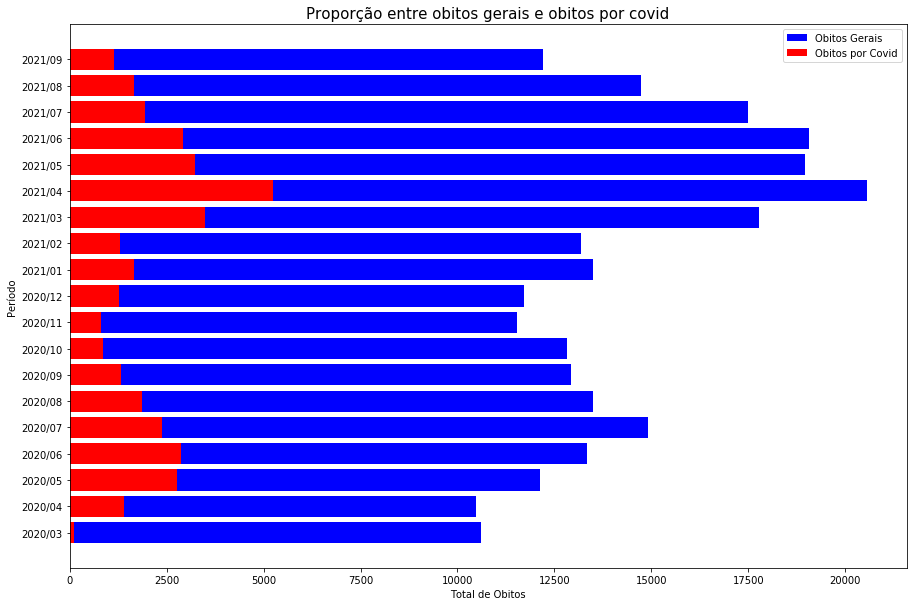

In [36]:
# Analisando em um gráfico de colunas empilhadas a quantidade de mortes
total_registros = resultado_final.count()[0]
labels = resultado_final.index
quantidade_ticks_x = np.arange(total_registros)
plt.figure(figsize=(15,10))
plt.barh(labels, resultado_final['Obitos Geral'], color="blue")
plt.barh(labels, resultado_final['Obitos Covid'], color="red")
plt.legend(("Obitos Gerais", "Obitos por Covid"))
plt.xlabel("Total de Obitos")
plt.ylabel("Período")
# plt.xticks(quantidade_ticks_x, labels, rotation=90)
plt.title("Proporção entre obitos gerais e obitos por covid", fontdict={"fontsize":15})
plt.show()

In [33]:
# Calculando o percentual de óbitos por covid em relação aos óbitos em geral por mês
percentual_de_mortes_por_covid = resultado_final['Obitos Covid'] / resultado_final['Obitos Geral']
percentual_de_mortes_por_covid  = percentual_de_mortes_por_covid.map(lambda x: "{0:.2f}".format(x*100)).astype(float)
percentual_de_mortes_por_covid

data
2020/03     1.14
2020/04    13.37
2020/05    22.73
2020/06    21.59
2020/07    16.01
2020/08    13.77
2020/09    10.24
2020/10     6.76
2020/11     6.97
2020/12    10.92
2021/01    12.27
2021/02     9.93
2021/03    19.62
2021/04    25.50
2021/05    17.04
2021/06    15.28
2021/07    11.09
2021/08    11.23
2021/09     9.40
dtype: float64

In [34]:
# Média geral de óbitos por covid em comparação aos óbitos por causas gerais
print(percentual_de_mortes_por_covid.mean())
print(resultado_final.sum())


13.413684210526316
Obitos Geral    271363
Obitos Covid     38252
dtype: int64


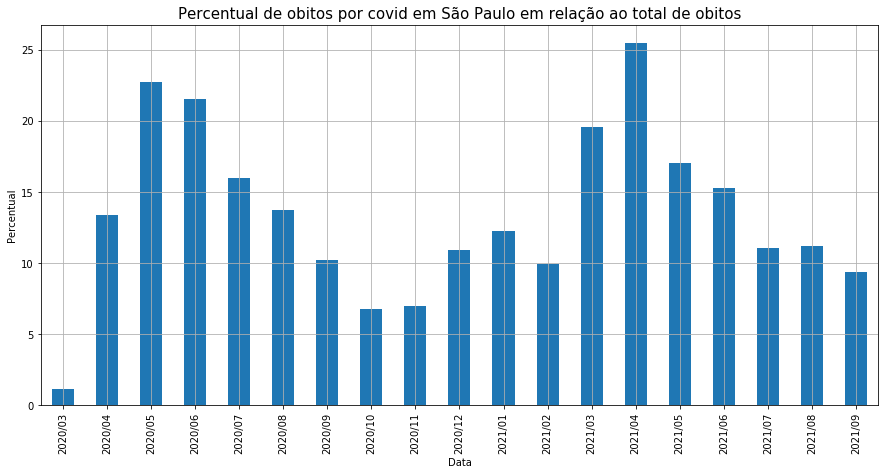

In [35]:
ax = percentual_de_mortes_por_covid.plot(kind="bar", figsize=(15,7), )
plt.title("Percentual de obitos por covid em São Paulo em relação ao total de obitos", fontdict={"fontsize":15} )
plt.xlabel("Data")
plt.ylabel("Percentual")
plt.grid()

# Conclusão:

Com as informações acima, podemos levantar as seguintes hipóteses:

* A infecções por Covid causaram um grande impacto no número geral de óbitos durante essa pandemia em São Paulo. Em alguns meses, o percentual de óbitos chegou a mais de 25% em relação ao total de óbitos por causas gerais, como podemos observar em abril de 2021. 
* Outra hipótese levantada, é comprovar a eficácia da vacina na população, já que no último mês (última atualização), setembro de 2021, o percentual de óbitos por covid caiu para 9,40%.
* No gráfico de colunas empilhadas podemos observar com mais clareza a proporção de óbitos por covid em relação aos óbitos gerais.
* Em média geral, as infecções por covid foram responsáveis por 13,41% das mortes em São Paulo no período de 03/2020 até 09/2021.
* No gráfico de barras empilhadas, podemos verificar claramente que ouveram 2 ondas de infecção, em que a segunda onda começou a ganhar força em março de 2021, e começou a regredir em maio de 2021, provavelmente devido ao resultado da vacinação.

O trabalho realizado e as hipósteses lenvantadas, poderiam ser mais precisos caso as informações de óbitos informados pelo DATASUS através do TABNET, fossem computados no dia exato da morte ao invés do dia do processamento, já que o paciente pode ter entrado em óbito no mês atual, e o processamento desse óbito ser concluído somente no mês seguinte.


